In [1]:
!pip install textblob
!pip install vaderSentiment

import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


In [2]:
data = {
    'Review': [
        "I love this product, it's fantastic!",
        "Terrible experience. Would not recommend.",
        "It's okay, not bad but not great either.",
        "Absolutely amazing! Highly recommend it.",
        "Worst purchase I've ever made."
    ]
}

df = pd.DataFrame(data)


In [3]:
# Function to classify polarity
def get_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply TextBlob
df['Polarity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['Polarity'].apply(get_sentiment)

df.head()


,Review,Polarity,Sentiment
0,"I love this product, it's fantastic!",0.500,Positive
1,Terrible experience. Would not recommend.,-1.000,Negative
2,"It's okay, not bad but not great either.",0.150,Positive
3,Absolutely amazing! Highly recommend it.,0.455,Positive
4,Worst purchase I've ever made.,-1.000,Negative


In [4]:
analyzer = SentimentIntensityAnalyzer()

# Apply VADER
df['VADER Score'] = df['Review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['VADER Sentiment'] = df['VADER Score'].apply(get_sentiment)

df


,Review,Polarity,Sentiment,VADER Score,VADER Sentiment
0,"I love this product, it's fantastic!",0.500,Positive,0.8439,Positive
1,Terrible experience. Would not recommend.,-1.000,Negative,-0.6381,Negative
2,"It's okay, not bad but not great either.",0.150,Positive,-0.4707,Negative
3,Absolutely amazing! Highly recommend it.,0.455,Positive,0.8147,Positive
4,Worst purchase I've ever made.,-1.000,Negative,-0.6249,Negative


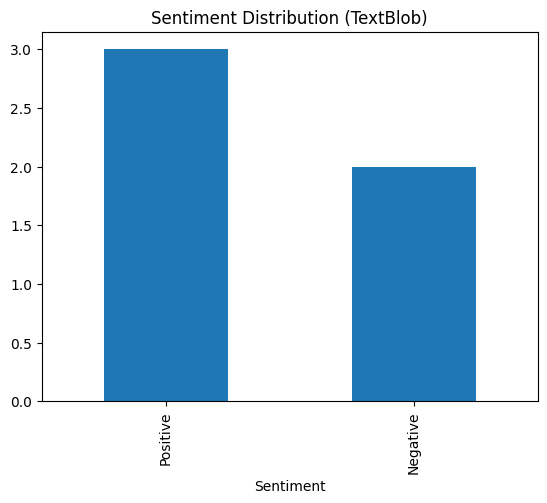

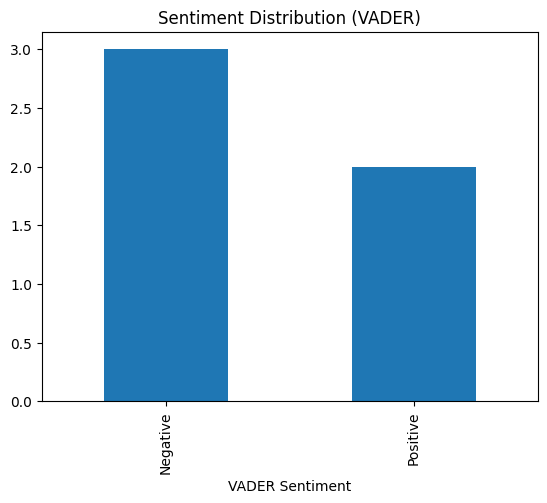

In [5]:
import matplotlib.pyplot as plt

# Count sentiment labels
df['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution (TextBlob)')
plt.show()

df['VADER Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution (VADER)')
plt.show()
